In [1]:
import os
os.environ['OMP_NUM_THREADS']="1"
from firedrake import *
import matplotlib.pyplot as plt
from firedrake import *
from firedrake.pyplot import triplot
import pyvista as pv
import math
import operator

In [2]:
dim = 2
mesh = RectangleMesh(60, 40, 3., 2., quadrilateral=True)
x, y = SpatialCoordinate(mesh)
label_outer = 101
label_inner = 100
label_interface = 5  # automatically labeled by Submesh
DG0 = FunctionSpace(mesh, "DG", 0)
f_outer = Function(DG0).interpolate(conditional(Or(Or(x < 1., x > 2.), y > 1.), 1, 0))
f_inner = Function(DG0).interpolate(conditional(And(And(x > 1., x < 2.), y < 1.), 1, 0))
mesh = RelabeledMesh(mesh, [f_outer, f_inner], [label_outer, label_inner])
x, y = SpatialCoordinate(mesh)
mesh_outer = Submesh(mesh, dim, label_outer)
x_outer, y_outer = SpatialCoordinate(mesh_outer)
mesh_inner = Submesh(mesh, dim, label_inner)
x_inner, y_inner = SpatialCoordinate(mesh_inner)
V_outer = FunctionSpace(mesh_outer, "CG", 5)
V_inner = FunctionSpace(mesh_inner, "CG", 5)
V = V_outer * V_inner
u = TrialFunction(V)
v = TestFunction(V)
sol = Function(V)
u_outer, u_inner = split(u)
v_outer, v_inner = split(v)
dx_outer = Measure("dx", domain=mesh_outer)
dx_inner = Measure("dx", domain=mesh_inner)
ds_outer = Measure("ds", domain=mesh_outer)
a = inner(grad(u_outer), grad(v_outer)) * dx_outer + \
    inner(u_inner, v_inner) * dx_inner
L = inner(x * y, v_inner) * dx_inner
dbc = DirichletBC(V.sub(0), x_outer * y_outer, (1, 2, 3, 4))
#solve(a == L, sol, bcs=[dbc])
ebc = EquationBC(inner(u_outer - u_inner, v_outer) * ds_outer(label_interface) == inner(Constant(0.), v_outer) * ds_outer(label_interface), sol, label_interface, V=V.sub(0))
solve(a == L, sol, bcs=[dbc,ebc])
assert sqrt(assemble(inner(sol[0] - x * y, sol[0] - x * y) * dx_outer)) < 1.e-12
assert sqrt(assemble(inner(sol[1] - x * y, sol[1] - x * y) * dx_inner)) < 1.e-12

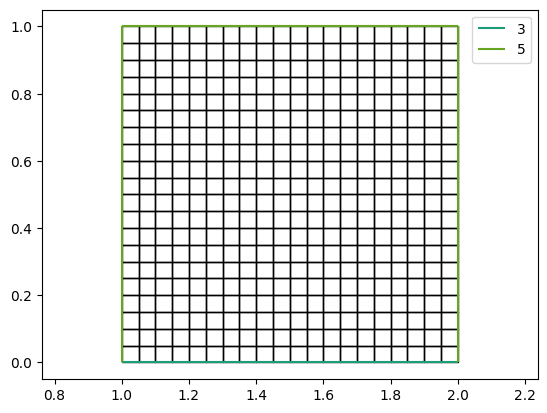

In [3]:
fig, axes = plt.subplots()
axes.axis('equal')
collection = triplot(mesh_inner, axes=axes)
axes.legend()

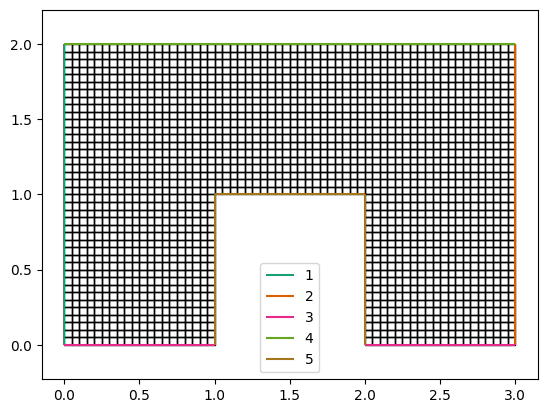

In [4]:
fig, axes = plt.subplots()
axes.axis('equal')
collection = triplot(mesh_outer, axes=axes)
axes.legend()

/tmp/ipykernel_1594069/228017721.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes.legend()


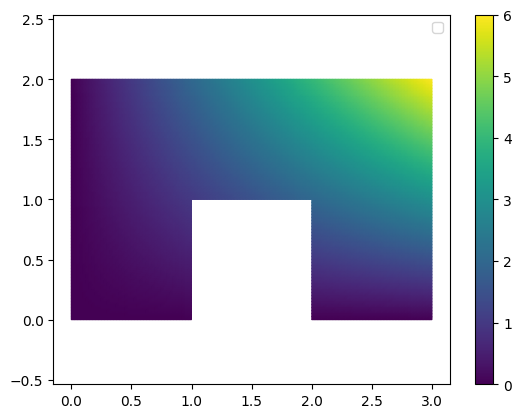

In [5]:
fig, axes = plt.subplots()
axes.axis('equal')
collection = tripcolor(sol.sub(0), axes=axes,vmin=0,vmax=6)
fig.colorbar(collection);
axes.legend()

/tmp/ipykernel_1594069/3302170315.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes.legend()


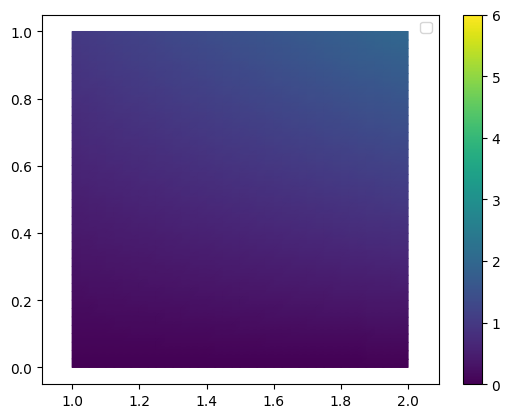

In [6]:
fig, axes = plt.subplots()
axes.axis('equal')
collection = tripcolor(sol.subfunctions[1], axes=axes,vmin=0,vmax=6)
fig.colorbar(collection)
axes.legend()

In [7]:
sqrt(assemble(inner(sol[0] - x * y, sol[0] - x * y) * dx_outer))

6.10398218515129e-13

In [8]:
sqrt(assemble(inner(sol[1] - x * y, sol[1] - x * y) * dx_inner))

3.612773011520451e-16

In [10]:
inner(u_outer - u_inner, v_outer) * ds_outer(label_interface) == inner(Constant(0.), v_outer) * ds_outer(label_interface)

Equation(Form([Integral(Product(Sum(Indexed(Argument(WithGeometry(MixedFunctionSpace(IndexedProxyFunctionSpace(<firedrake.mesh.MeshTopology object at 0x7f0476d65250>, FiniteElement('Q', quadrilateral, 5), name=None, index=0, component=None), IndexedProxyFunctionSpace(<firedrake.mesh.MeshTopology object at 0x7f04712d7860>, FiniteElement('Q', quadrilateral, 5), name=None, index=1, component=None), name='None_None'), MeshSequence((Mesh(VectorElement(FiniteElement('Q', quadrilateral, 1), dim=2), 7), Mesh(VectorElement(FiniteElement('Q', quadrilateral, 1), dim=2), 9)))), 1, None), MultiIndex((FixedIndex(0),))), Product(IntValue(-1), Indexed(Argument(WithGeometry(MixedFunctionSpace(IndexedProxyFunctionSpace(<firedrake.mesh.MeshTopology object at 0x7f0476d65250>, FiniteElement('Q', quadrilateral, 5), name=None, index=0, component=None), IndexedProxyFunctionSpace(<firedrake.mesh.MeshTopology object at 0x7f04712d7860>, FiniteElement('Q', quadrilateral, 5), name=None, index=1, component=None), n